## Part 1 Randomized optimization

**source code adapted from ML Rose tutorial:** https://mlrose.readthedocs.io/en/stable/source/tutorial1.html

In [116]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import mlrose
import time
import random
import itertools
import math

In [117]:
def fill_array(max_iters, curve):
    max_value = max(curve)
    
    empty_array = np.empty(max_iters)
    empty_array[:] = max_value
    
    len_curve = len(curve)
    
    if len_curve >= max_iters:
        empty_array[0:max_iters] = curve[0:max_iters]
    else:
        empty_array[0:len_curve] = curve[0:len_curve]
    
    return empty_array, len_curve

In [76]:
# four peaks
fitness = mlrose.FourPeaks() 
problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness, maximize = True, max_val=2)

max_attempts = 1000
max_iters = math.inf

#randomized hill climbing
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 10, curve = True,
                                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                                   random_state = 6)
end_time = time.time()
rhc_time = end_time - start_time
print('The best state found for RHC is: ', best_state)
print('The fitness at the best state for RHC is: ', best_fitness)
print('run time for RHC is: ', rhc_time)

#simulated annealing
start_time = time.time()
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose.simulated_annealing(problem, curve = True,
                                                                              max_attempts = max_attempts, 
                                                                              max_iters = max_iters,
                                                                              random_state = 6,
                                                                              schedule=mlrose.GeomDecay(init_temp = 100, decay=0.8, min_temp=1)
                                                                             )
end_time = time.time()
sa_time = end_time - start_time
print('The best state found for SA is: ', best_state_SA)
print('The fitness at the best state for SA is: ', best_fitness_SA)
print('run time for SA is: ', sa_time)

#GA algorithm
start_time = time.time()
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose.genetic_alg(problem, curve = True,
                                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                                      random_state = 6, pop_size=500,
                                                                      mutation_prob=0.001
                                                                     )
end_time = time.time()
ga_time = end_time - start_time
print('The best state found for GA is: ', best_state_GA)
print('The fitness at the best state for GA is: ', best_fitness_GA)
print('run time for GA is: ', ga_time)


#MIMIC
start_time = time.time()
best_state_MM, best_fitness_MM, fitness_curve_MM = mlrose.mimic(problem, curve = True,
                                                                max_attempts = max_attempts, max_iters = max_iters,
                                                                fast_mimic=True,
                                                                random_state = 6
                                                                )
end_time = time.time()
mimic_time = end_time - start_time
print('The best state found for MIMIC is: ', best_state_MM)
print('The fitness at the best state for MIMIC is: ', best_fitness_MM)
print('run time for MIMIC is: ', mimic_time)

The best state found for RHC is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The fitness at the best state for RHC is:  100.0
run time for RHC is:  1.6746118068695068
The best state found for SA is:  [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The fitness at the best state for SA is:  189.0
run time for SA is:  3.585314989089966
The best state found for GA is:  [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The fitness at the best state for GA is:  161.0
run time for GA is:  156.65764093399048
The best state found fo

In [64]:
print(len(fitness_curve))
print(len(fitness_curve_SA))
print(len(fitness_curve_GA))
print(len(fitness_curve_MM))

46326
11689
1285
538


In [67]:
## fill fitness curve after reach the max value with the max value
max_iters = 20000
fitness_RHC, len_RHC = fill_array(max_iters, fitness_curve)
fitness_SA, len_SA = fill_array(max_iters, fitness_curve_SA)
fitness_GA, len_GA = fill_array(max_iters, fitness_curve_GA)
fitness_MM, len_MM = fill_array(max_iters, fitness_curve_MM) 

  Algorithm  Time (s)
0       RHC   1.01356
1        SA   0.50372
2        GA  25.02479
3     MIMIC  44.28104


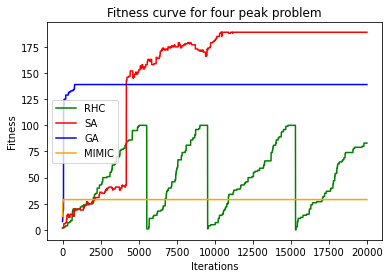

In [68]:
 # Plot Iterations vs Fitness
iterations = range(1, 20001)

plt.figure()

plt.plot(iterations, fitness_RHC, label='RHC', color='green')
plt.plot(iterations, fitness_SA, label='SA', color='red')
plt.plot(iterations, fitness_GA, label='GA', color='blue')
plt.plot(iterations, fitness_MM, label='MIMIC', color='orange')

plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title('Fitness curve for four peak problem')

data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
print(df)

In [81]:
# max k Colour

all_edges = list(itertools.combinations(list(range(0, 99)), 2)) ## all edges between 0-99, 4950 edges
edges = random.sample(all_edges, 1500)


fitness = mlrose.MaxKColor(edges) 

problem = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness,
                             maximize = True, max_val = 2)

max_attempts = 200
max_iters = math.inf

#randomized hill climbing
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 100, curve = True,
                                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                                   random_state = 6)
end_time = time.time()
rhc_time = end_time - start_time
print('The best state found for RHC is: ', best_state)
print('The fitness at the best state for RHC is: ', best_fitness)
print('run time for RHC is: ', rhc_time)

# run simulated annealing
start_time = time.time()
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose.simulated_annealing(problem, curve = True,
                                                                              max_attempts = max_attempts, 
                                                                              max_iters = max_iters,
                                                                              random_state = 6,
                                                                              schedule=mlrose.GeomDecay(init_temp = 100, decay=0.1, min_temp=1)
                                                                             )
end_time = time.time()
sa_time = end_time - start_time
print('The best state found for SA is: ', best_state_SA)
print('The fitness at the best state for SA is: ', best_fitness_SA)
print('run time for SA is: ', sa_time)

#generic algorithm
start_time = time.time()
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose.genetic_alg(problem, curve = True,
                                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                                      random_state = 6, 
                                                                      pop_size=200,
                                                                      mutation_prob=0.001
                                                                     )
end_time = time.time()
ga_time = end_time - start_time
print('The best state found for GA is: ', best_state_GA)
print('The fitness at the best state for GA is: ', best_fitness_GA)
print('run time for GA is: ', ga_time)


#MIMIC
start_time = time.time()
best_state_MM, best_fitness_MM, fitness_curve_MM = mlrose.mimic(problem, curve = True,
                                                                max_attempts = max_attempts, max_iters = max_iters,
                                                                fast_mimic=True,
                                                                random_state = 6
                                                                )
end_time = time.time()
mimic_time = end_time - start_time
print('The best state found for MIMIC is: ', best_state_MM)
print('The fitness at the best state for MIMIC is: ', best_fitness_MM)
print('run time for MIMIC is: ', mimic_time)

The best state found for RHC is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
The fitness at the best state for RHC is:  1500.0
run time for RHC is:  48.65149474143982
The best state found for SA is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The fitness at the best state for SA is:  1500.0
run time for SA is:  2.000124216079712
The best state found for GA is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The fitness at the best state for GA is:  1478.0
run time for GA is:  187.11678338050842
The best state found 

In [82]:
print(len(fitness_curve))
print(len(fitness_curve_SA))
print(len(fitness_curve_GA))
print(len(fitness_curve_MM))

60765
2734
1020
211


In [83]:
## fill fitness curve after reach the max value with the max value
max_iters = 1000
fitness_RHC, len_RHC = fill_array(max_iters, fitness_curve)
fitness_SA, len_SA = fill_array(max_iters, fitness_curve_SA)
fitness_GA, len_GA = fill_array(max_iters, fitness_curve_GA)
fitness_MM, len_MM = fill_array(max_iters, fitness_curve_MM)

  Algorithm   Time (s)
0       RHC   48.65149
1        SA    2.00012
2        GA  187.11678
3     MIMIC   52.56470


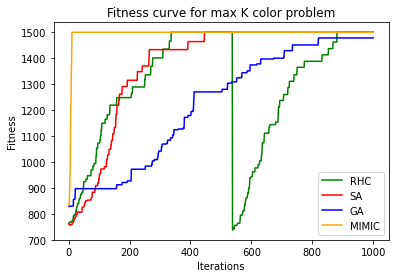

In [84]:
 # Plot Iterations vs Fitness
iterations = range(1, 1001)

plt.figure()

plt.plot(iterations, fitness_RHC, label='RHC', color='green')
plt.plot(iterations, fitness_SA, label='SA', color='red')
plt.plot(iterations, fitness_GA, label='GA', color='blue')
plt.plot(iterations, fitness_MM, label='MIMIC', color='orange')

plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title('Fitness curve for max K color problem')

data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
print(df)

In [104]:
#8 queens

fitness = mlrose.Queens()

# define a optimization problem object
problem = mlrose.DiscreteOpt(length = 20, fitness_fn = fitness,
                             maximize = True, max_val = 2)

max_attempts = 200
max_iters = math.inf

# run randomized hill climbing
start_time = time.time()
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = 1000, curve = True,
                                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                                   random_state = 6)
end_time = time.time()
rhc_time = end_time - start_time
print('The best state found for RHC is: ', best_state)
print('The fitness at the best state for RHC is: ', best_fitness)
print('run time for RHC is: ', rhc_time)

# run simulated annealing
start_time = time.time()
best_state_SA, best_fitness_SA, fitness_curve_SA = mlrose.simulated_annealing(problem, curve = True,
                                                                              max_attempts = max_attempts, 
                                                                              max_iters = max_iters,
                                                                              random_state = 6,
                                                                              schedule=mlrose.GeomDecay(init_temp = 100, decay=0.1, min_temp=1)
                                                                             )
end_time = time.time()
sa_time = end_time - start_time
print('The best state found for SA is: ', best_state_SA)
print('The fitness at the best state for SA is: ', best_fitness_SA)
print('run time for SA is: ', sa_time)

# run generic algorithm
start_time = time.time()
best_state_GA, best_fitness_GA, fitness_curve_GA = mlrose.genetic_alg(problem, curve = True,
                                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                                      random_state = 6
                                                                     )
end_time = time.time()
ga_time = end_time - start_time
print('The best state found for GA is: ', best_state_GA)
print('The fitness at the best state for GA is: ', best_fitness_GA)
print('run time for GA is: ', ga_time)


# run MIMIC
start_time = time.time()
best_state_MM, best_fitness_MM, fitness_curve_MM = mlrose.mimic(problem, curve = True,
                                                                max_attempts = max_attempts, max_iters = max_iters,
                                                                fast_mimic=True,
                                                                random_state = 42
                                                                )
end_time = time.time()
mimic_time = end_time - start_time
print('The best state found for MIMIC is: ', best_state_MM)
print('The fitness at the best state for MIMIC is: ', best_fitness_MM)
print('run time for MIMIC is: ', mimic_time)

The best state found for RHC is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The fitness at the best state for RHC is:  190.0
run time for RHC is:  201.42500853538513
The best state found for SA is:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The fitness at the best state for SA is:  190.0
run time for SA is:  0.159423828125
The best state found for GA is:  [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
The fitness at the best state for GA is:  173.0
run time for GA is:  1868.2282209396362
The best state found for MIMIC is:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The fitness at the best state for MIMIC is:  190.0
run time for MIMIC is:  4.887033224105835


In [113]:
print(len(fitness_curve))
print(len(fitness_curve_SA))
print(len(fitness_curve_GA))
print(len(fitness_curve_MM))

254944
250
252
204


In [114]:
max_iters = 1000
fitness_RHC, len_RHC = fill_array(max_iters, fitness_curve)
fitness_SA, len_SA = fill_array(max_iters, fitness_curve_SA)
fitness_GA, len_GA = fill_array(max_iters, fitness_curve_GA)
fitness_MM, len_MM = fill_array(max_iters, fitness_curve_MM)

  Algorithm    Time (s)
0       RHC   201.42501
1        SA     0.15942
2        GA  1868.22822
3     MIMIC     4.88703


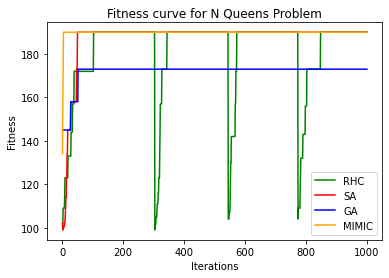

In [115]:
iterations = range(1, 1001)

plt.figure()

plt.plot(iterations, fitness_RHC, label='RHC', color='green')
plt.plot(iterations, fitness_SA, label='SA', color='red')
plt.plot(iterations, fitness_GA, label='GA', color='blue')
plt.plot(iterations, fitness_MM, label='MIMIC', color='orange')

plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title('Fitness curve for N Queens Problem')

data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
print(df)

## Part 2 Randomized Optimation NN

**Source code taken and adapted from https://mlrose.readthedocs.io/en/stable/source/tutorial3.html**

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mlrose
import mlrose_hiive
import time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [173]:
df_bank_churn = pd.read_csv('bankchurn.csv')
#clean ups
df_bank_churn = df_bank_churn.drop(columns=['RowNumber','Surname','CustomerId'], axis = 1)
df_bank_churn['Gender'] = df_bank_churn['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 0 if x== 'France' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 1 if x== 'Spain' else x)
df_bank_churn['Geography'] = df_bank_churn['Geography'].apply(lambda x: 2 if x== 'Germany' else x)


target_column = ['Exited'] 
predictors = list(set(list(df_bank_churn.columns))-set(target_column))
df_bank_churn[predictors] = df_bank_churn[predictors]/df_bank_churn[predictors].max()

X = df_bank_churn[predictors].values
y = df_bank_churn[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=6)


one_hot = OneHotEncoder()

train_labels_onehot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
test_labels_onehot = one_hot.transform(y_test.reshape(-1, 1)).todense()


label = LabelEncoder()
train_labels_label = label.fit_transform(y_train)
test_labels_label = label.fit_transform(y_test)

# normalize x
scaler = MinMaxScaler()

train_features = scaler.fit_transform(X_train)
test_features = scaler.transform(X_test)

In [174]:
clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                           algorithm = 'gradient_descent',early_stopping = False, 
                           max_attempts = 100, max_iters = 2500, clip_max = 5,
                           bias = True, learning_rate = 0.00001,
                           curve = True, random_state=42)

start_time = time.time()
clf.fit(train_features, train_labels_onehot)
end_time = time.time()
base_time = end_time-start_time
y_pred = clf.predict(test_features)
gd_score = metrics.accuracy_score(test_labels_onehot, y_pred)
gd_fitness_curve = clf.fitness_curve

print('train time:', base_time)
print('accuracy:', gd_score)

train time: 44.36055302619934
accuracy: 0.8365


Text(0.5, 1.0, 'Loss curve for NN with gradient descent')

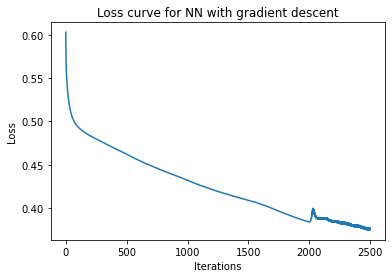

In [175]:
gd_fitness_curve = [ -x for x in gd_fitness_curve]

plt.figure()

plt.plot(gd_fitness_curve)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Loss curve for NN with gradient descent')

In [176]:
results = []
for i in range(1, 2501,250):
        clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                                   algorithm ='gradient_descent',early_stopping = False, 
                                   max_attempts = 100, max_iters = i, clip_max = 5,
                                   bias = True, learning_rate = 0.00001,
                                   curve = False, random_state=42)
        clf.fit(train_features, train_labels_onehot)
        y_train_pred = clf.predict(train_features)
        y_train_accuracy = metrics.accuracy_score(train_labels_onehot, y_train_pred)

        y_pred = clf.predict(test_features)
        y_test_accuracy = metrics.accuracy_score(test_labels_onehot, y_pred)

        results.append([i, 'gradient_descent', y_train_accuracy, y_test_accuracy])
        print([i, 'gradient_descent', y_train_accuracy, y_test_accuracy])

[1, 'gradient_descent', 0.726, 0.74225]
[251, 'gradient_descent', 0.798, 0.79575]
[501, 'gradient_descent', 0.7978333333333333, 0.7965]
[751, 'gradient_descent', 0.807, 0.80425]
[1001, 'gradient_descent', 0.8141666666666667, 0.8095]
[1251, 'gradient_descent', 0.8205, 0.816]
[1501, 'gradient_descent', 0.8243333333333334, 0.81875]
[1751, 'gradient_descent', 0.8318333333333333, 0.82475]
[2001, 'gradient_descent', 0.8383333333333334, 0.83275]
[2251, 'gradient_descent', 0.8398333333333333, 0.83225]


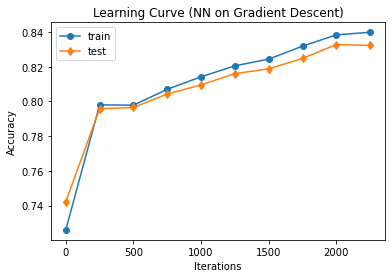

In [178]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train_Accuracy", "Test_Accuracy"])
plt.figure()
plt.plot(df['Iterations'], df['Train_Accuracy'], marker='o')
plt.ylabel('Accuracy')
plt.title('Learning Curve (NN on Gradient Descent)')
plt.plot(df['Iterations'], df['Test_Accuracy'], marker='d')
plt.xlabel('Iterations')
plt.legend(['train', 'test'])

In [183]:
## RHC
clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                           algorithm = 'random_hill_climb',early_stopping = False, 
                           max_attempts = 1000, max_iters = 2500, clip_max = 5,
                           bias = True, learning_rate = 1,
                           curve = True, random_state=6)
start_time = time.time()
clf.fit(train_features, train_labels_onehot)
end_time = time.time()
rhc_time = end_time-start_time
y_pred = clf.predict(test_features)
rhc_score = metrics.accuracy_score(test_labels_onehot, y_pred)
rhc_fitness_curve = clf.fitness_curve

print('train time:', rhc_time)
print('accuracy:', rhc_score)

train time: 20.48890972137451
accuracy: 0.8315


Text(0.5, 1.0, 'Loss curve NN (RHC)')

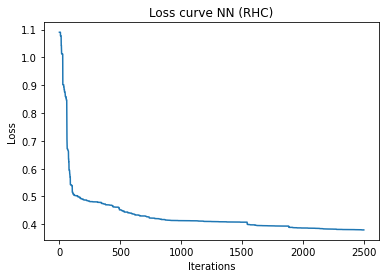

In [187]:
rhc_fitness_curve = [ -x for x in rhc_fitness_curve]

plt.figure()

plt.plot(rhc_fitness_curve)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Loss curve NN (RHC)')

In [184]:
results = []

for i in range(1, 2501, 250):
        clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                                   algorithm ='random_hill_climb',early_stopping = False, 
                                   max_attempts = 1000, max_iters = i, clip_max = 5,
                                   bias = True, learning_rate = 0.1,
                                   curve = False, random_state=6)
        clf.fit(train_features, train_labels_onehot)
        y_train_pred = clf.predict(train_features)
        y_train_accuracy = metrics.accuracy_score(train_labels_onehot, y_train_pred)

        y_pred = clf.predict(test_features)
        y_test_accuracy = metrics.accuracy_score(test_labels_onehot, y_pred)

        results.append([i, 'random_hill_climb', y_train_accuracy, y_test_accuracy])
        print([i, 'random_hill_climb', y_train_accuracy, y_test_accuracy])

[1, 'random_hill_climb', 0.32133333333333336, 0.33575]
[251, 'random_hill_climb', 0.6721666666666667, 0.67175]
[501, 'random_hill_climb', 0.797, 0.796]
[751, 'random_hill_climb', 0.7971666666666667, 0.79525]
[1001, 'random_hill_climb', 0.7971666666666667, 0.795]
[1251, 'random_hill_climb', 0.7971666666666667, 0.795]
[1501, 'random_hill_climb', 0.7996666666666666, 0.798]
[1751, 'random_hill_climb', 0.7998333333333333, 0.79725]
[2001, 'random_hill_climb', 0.8016666666666666, 0.797]
[2251, 'random_hill_climb', 0.8061666666666667, 0.803]


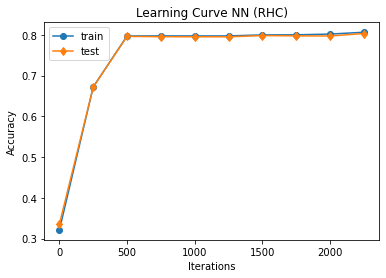

In [186]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train_Accuracy", "Test_Accuracy"])
plt.figure()
plt.plot(df['Iterations'], df['Train_Accuracy'], marker='o')
plt.ylabel('Accuracy')
plt.title('Learning Curve NN (RHC)')
plt.plot(df['Iterations'], df['Test_Accuracy'], marker='d')
plt.xlabel('Iterations')
plt.legend(['train', 'test'])

In [188]:
## SA
clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                           algorithm = 'simulated_annealing',early_stopping = False, 
                           max_attempts = 1000, max_iters = 2500, clip_max = 5,
                           bias = True, learning_rate = 0.1,schedule=mlrose.GeomDecay(init_temp = 100, decay=0.1, min_temp=1),
                           curve = True, random_state=6)
start_time = time.time()
clf.fit(train_features, train_labels_onehot)
end_time = time.time()
sa_time = end_time-start_time
y_pred = clf.predict(test_features)
sa_score = metrics.accuracy_score(test_labels_onehot, y_pred)
sa_fitness_curve = clf.fitness_curve

print('train time:', sa_time)
print('accuracy:', sa_score)

train time: 33.990243434906006
accuracy: 0.509


Text(0.5, 1.0, 'Loss curve for NN (SA)')

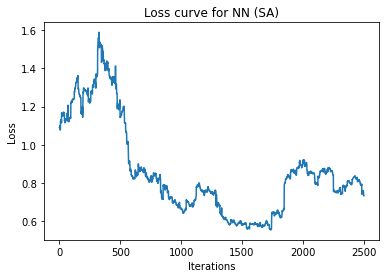

In [189]:
sa_fitness_curve = [ -x for x in sa_fitness_curve]

plt.figure()

plt.plot(sa_fitness_curve)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Loss curve for NN (SA)')

In [190]:
results = []


for i in range(1, 2501, 250):
        clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                                   algorithm ='simulated_annealing',early_stopping = False, 
                                   max_attempts = 1000, max_iters = i, clip_max = 5,
                                   bias = True, learning_rate = 0.1,schedule=mlrose.GeomDecay(init_temp = 100, decay=0.1, min_temp=1),
                                   curve = False, random_state=6)
        clf.fit(train_features, train_labels_onehot)
        y_train_pred = clf.predict(train_features)
        y_train_accuracy = metrics.accuracy_score(train_labels_onehot, y_train_pred)

        y_pred = clf.predict(test_features)
        y_test_accuracy = metrics.accuracy_score(test_labels_onehot, y_pred)

        results.append([i, 'simulated_annealing', y_train_accuracy, y_test_accuracy])
        print([i, 'simulated_annealing', y_train_accuracy, y_test_accuracy])

[1, 'simulated_annealing', 0.32133333333333336, 0.3355]
[251, 'simulated_annealing', 0.31166666666666665, 0.31425]
[501, 'simulated_annealing', 0.34983333333333333, 0.35475]
[751, 'simulated_annealing', 0.445, 0.442]
[1001, 'simulated_annealing', 0.6358333333333334, 0.637]
[1251, 'simulated_annealing', 0.5086666666666667, 0.498]
[1501, 'simulated_annealing', 0.718, 0.71825]
[1751, 'simulated_annealing', 0.6375, 0.63025]
[2001, 'simulated_annealing', 0.30966666666666665, 0.31425]
[2251, 'simulated_annealing', 0.4876666666666667, 0.4775]


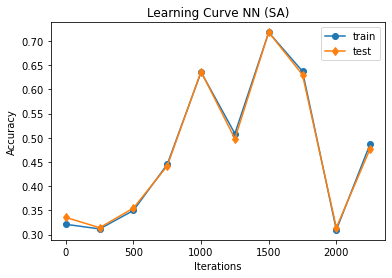

In [192]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train_Accuracy", "Test_Accuracy"])
plt.figure()
plt.plot(df['Iterations'], df['Train_Accuracy'], marker='o')
plt.ylabel('Accuracy')
plt.title('Learning Curve NN (SA)')
plt.plot(df['Iterations'], df['Test_Accuracy'], marker='d')
plt.xlabel('Iterations')
plt.legend(['train', 'test'])

In [195]:
#GA
results = []

max_iters = 10

max_attempts_list = [500, 1000]
pop_size_list = [200, 500]
mutation_prob_list = [0.05, 0.1]

# run generic algorithm
for pop in pop_size_list:
  for mutation in mutation_prob_list:
    for max_attempt in max_attempts_list:
        clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                                  algorithm = 'genetic_alg',early_stopping = False, 
                                  max_attempts = max_attempt, max_iters = max_iters, clip_max = 5,
                                  bias = True, learning_rate = 0.1, pop_size=pop, mutation_prob=mutation,
                                  curve = False, random_state=6)
        start_time = time.time()
        clf.fit(train_features, train_labels_onehot)
        end_time = time.time()
        ga_time = end_time-start_time
        y_pred = clf.predict(test_features)
        ga_score = metrics.accuracy_score(test_labels_onehot, y_pred)

        results.append([pop, mutation, max_attempt, 'GA', ga_score, ga_time])
        print([pop, mutation, max_attempt, ga_score, ga_time])

[200, 0.05, 500, 0.797, 16.623430252075195]
[200, 0.05, 1000, 0.797, 18.075079679489136]
[200, 0.1, 500, 0.769, 18.175957202911377]
[200, 0.1, 1000, 0.769, 24.17591094970703]
[500, 0.05, 500, 0.76, 50.984235525131226]
[500, 0.05, 1000, 0.76, 43.68182682991028]
[500, 0.1, 500, 0.77825, 93.02092266082764]
[500, 0.1, 1000, 0.77825, 66.90659642219543]


In [196]:
#GA
clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                           algorithm = 'genetic_alg',early_stopping = False, 
                           max_attempts = 500, max_iters = 10, clip_max = 5,
                           bias = True, learning_rate = 0.1, pop_size=200, mutation_prob=0.05,
                           curve = True, random_state=6)
start_time = time.time()
clf.fit(train_features, train_labels_onehot)
end_time = time.time()
ga_time = end_time-start_time
y_pred = clf.predict(test_features)
ga_score = metrics.accuracy_score(test_labels_onehot, y_pred)
ga_fitness_curve = clf.fitness_curve
ga_fitness_weight = clf.fitted_weights 

print('train time:', ga_time)
print('accuracy:', ga_score)
#print(ga_fitness_weight)

train time: 15.37125825881958
accuracy: 0.797


Text(0.5, 1.0, 'Loss curve for NN with GA')

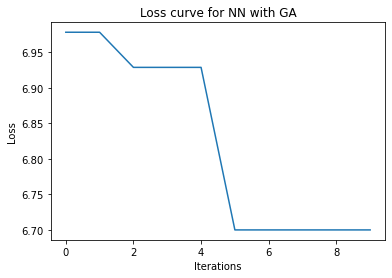

In [197]:
ga_fitness_curve = [ -x for x in ga_fitness_curve]

plt.figure()

plt.plot(ga_fitness_curve)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title('Loss curve for NN with GA')

In [202]:
results = []

for i in range(1, 12, 5):
        clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                           algorithm = 'genetic_alg',early_stopping = False, 
                           max_attempts = 500, max_iters = i, clip_max = 5,
                           bias = True, learning_rate = 0.1, pop_size=200, mutation_prob=0.05,
                           curve = True, random_state=6)
        clf.fit(train_features, train_labels_onehot)
        y_train_pred = clf.predict(train_features)
        y_train_accuracy = metrics.accuracy_score(train_labels_onehot, y_train_pred)

        y_pred = clf.predict(test_features)
        y_test_accuracy = metrics.accuracy_score(test_labels_onehot, y_pred)

        results.append([i, 'genetic_alg', y_train_accuracy, y_test_accuracy])
        print([i, 'genetic_alg', y_train_accuracy, y_test_accuracy])

[1, 'genetic_alg', 0.7895, 0.79225]
[6, 'genetic_alg', 0.801, 0.797]
[11, 'genetic_alg', 0.801, 0.797]


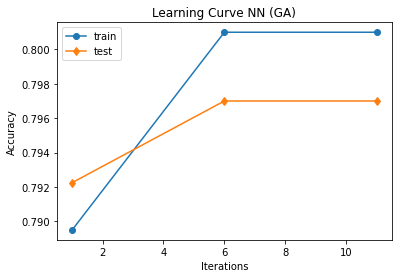

In [203]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train_Accuracy", "Test_Accuracy"])
plt.figure()
plt.plot(df['Iterations'], df['Train_Accuracy'], marker='o')
plt.ylabel('Accuracy')
plt.title('Learning Curve NN (GA)')
plt.plot(df['Iterations'], df['Test_Accuracy'], marker='d')
plt.xlabel('Iterations')
plt.legend(['train', 'test'])

In [205]:
for i in range(1, 2501, 250):
        clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                                   algorithm ='random_hill_climb',early_stopping = False, 
                                   max_attempts = 1000, max_iters = i, clip_max = 5,
                                   bias = True, learning_rate = 0.1,
                                   curve = False, random_state=6)
        clf.fit(train_features, train_labels_onehot)
        y_train_pred = clf.predict(train_features)
        y_train_accuracy = metrics.accuracy_score(train_labels_onehot, y_train_pred)

        y_pred = clf.predict(test_features)
        y_test_accuracy = metrics.accuracy_score(test_labels_onehot, y_pred)

        results.append([i, 'random_hill_climb', y_train_accuracy, y_test_accuracy])
        print([i, 'random_hill_climb', y_train_accuracy, y_test_accuracy])

[1, 'random_hill_climb', 0.32133333333333336, 0.33575]
[251, 'random_hill_climb', 0.6721666666666667, 0.67175]
[501, 'random_hill_climb', 0.797, 0.796]
[751, 'random_hill_climb', 0.7971666666666667, 0.79525]
[1001, 'random_hill_climb', 0.7971666666666667, 0.795]
[1251, 'random_hill_climb', 0.7971666666666667, 0.795]
[1501, 'random_hill_climb', 0.7996666666666666, 0.798]
[1751, 'random_hill_climb', 0.7998333333333333, 0.79725]
[2001, 'random_hill_climb', 0.8016666666666666, 0.797]
[2251, 'random_hill_climb', 0.8061666666666667, 0.803]


In [207]:
clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                           algorithm = 'random_hill_climb',early_stopping = False, 
                           max_attempts = 1000, max_iters = 2500, clip_max = 5,
                           bias = True, learning_rate = 1,
                           curve = True, random_state=6)
start_time = time.time()
clf.fit(train_features, train_labels_onehot)
end_time = time.time()
rhc_time = end_time-start_time
y_pred = clf.predict(test_features)
rhc_score = metrics.accuracy_score(test_labels_onehot, y_pred)
rhc_fitness_curve = clf.fitness_curve

print('train time:', rhc_time)
print('accuracy:', rhc_score)

train time: 19.201094150543213
accuracy: 0.8315


In [208]:
#gradient_descent
clf = mlrose.NeuralNetwork(hidden_nodes=[10,10,10], activation='relu',
                           algorithm = 'gradient_descent',early_stopping = False, 
                           max_attempts = 100, max_iters = 2500, clip_max = 5,
                           bias = True, learning_rate = 1,
                           curve = True, random_state=42)

start_time = time.time()
clf.fit(train_features, train_labels_onehot)
end_time = time.time()
base_time = end_time-start_time
y_pred = clf.predict(test_features)
gd_score = metrics.accuracy_score(test_labels_onehot, y_pred)
gd_fitness_curve = clf.fitness_curve

print('train time:', base_time)
print('accuracy:', gd_score)

train time: 41.59274482727051
accuracy: 0.795
